# Clustering

In [1]:
getData <- function(N=30) {
    x1 <- c(
        rnorm(N, mean=2.5, sd=2.5),
        rnorm(N, mean=10.5, sd=2.5)
    )
    x2 <- c(
        rnorm(N, mean=2.5, sd=2.5),
        rnorm(N, mean=10.5, sd=2.5)
    )
    y <- c(rep(0, N), rep(1, N))
    X <- data.frame(x1=x1, x2=x2)
    return(list(X=X, y=y))
}

D = getData()

## K-means

In [2]:
m <- kmeans(D$X, 2)

In [3]:
print(m)

K-means clustering with 2 clusters of sizes 30, 30

Cluster means:
         x1        x2
1 10.519288 10.215782
2  1.618027  2.197318

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 306.8271 403.1129
 (between_SS / total_SS =  75.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [4]:
print(m$totss)

[1] 2862.863


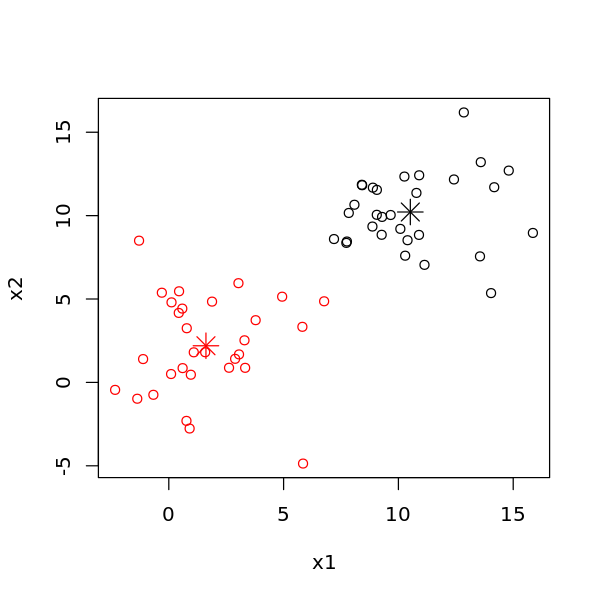

In [5]:
options(repr.plot.width=5, repr.plot.height=5)

plot(D$X, col=m$cluster)
points(m$centers, col=1:2, pch=8, cex=2)

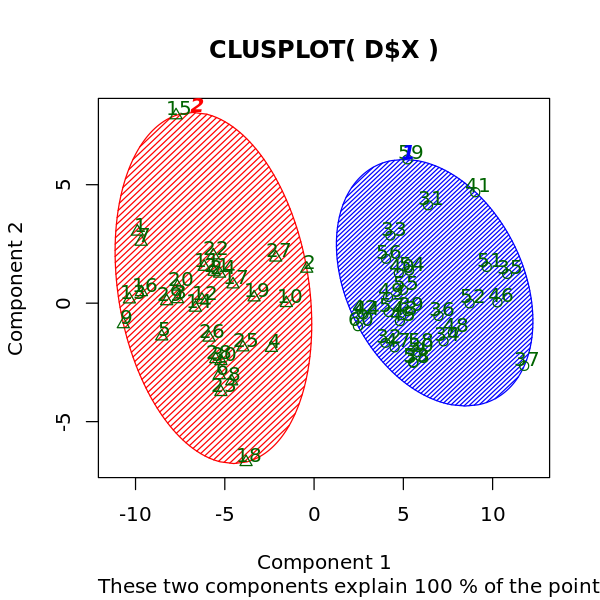

In [6]:
library('cluster')

options(repr.plot.width=5, repr.plot.height=5)

clusplot(D$X, m$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

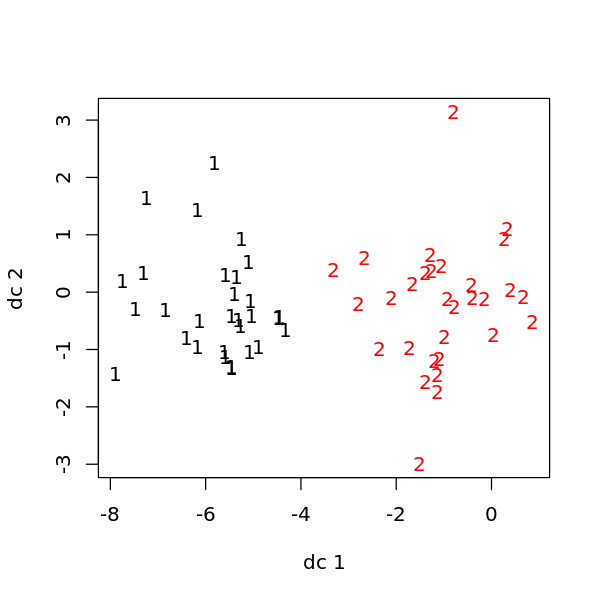

In [7]:
library('fpc')

options(repr.plot.width=5, repr.plot.height=5)
plotcluster(D$X, m$cluster)

## Ward hierarchical clustering

In [8]:
d <- dist(D$X, method='euclidean')
m <- hclust(d, method='ward.D2')

In [9]:
print(m)


Call:
hclust(d = d, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 60 



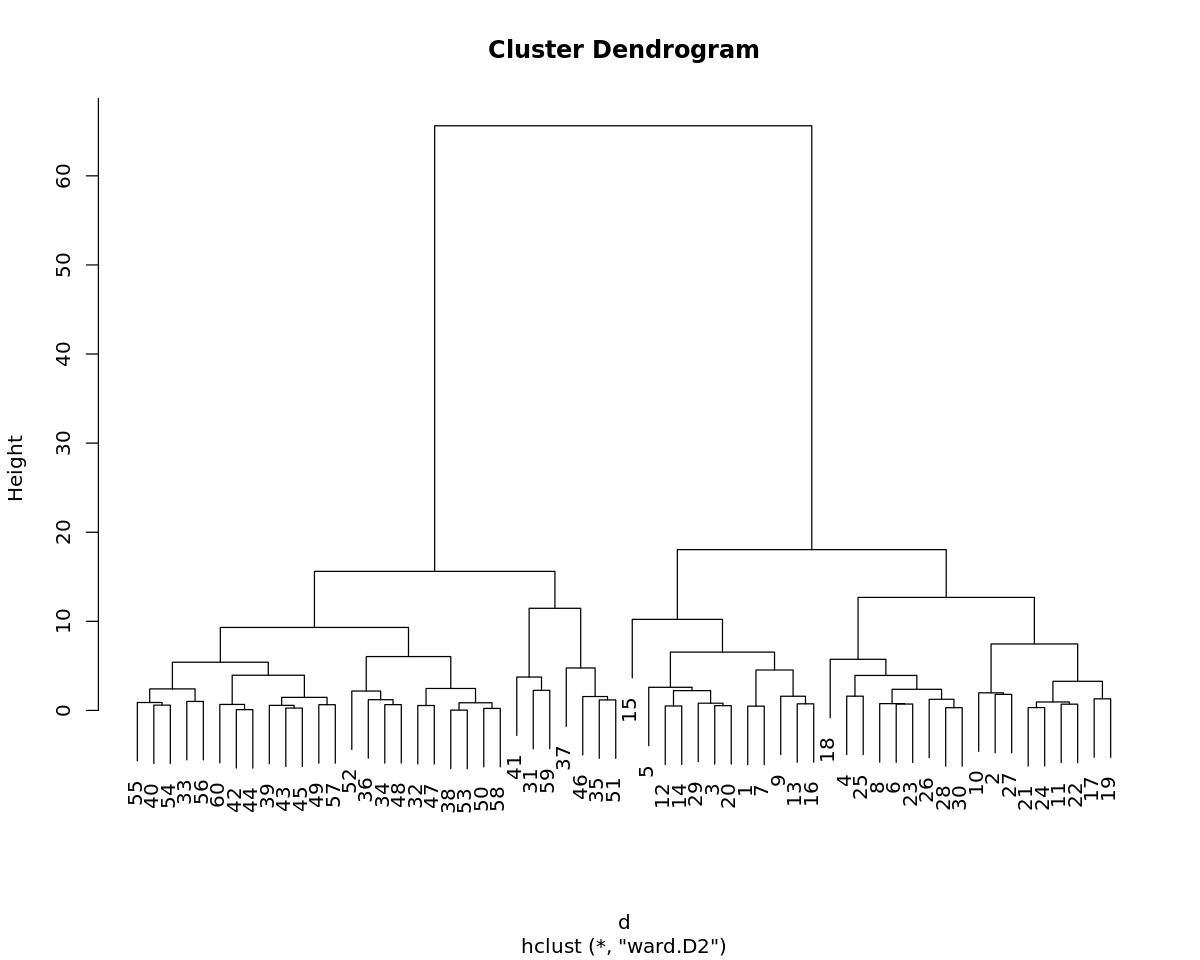

In [10]:
options(repr.plot.width=10, repr.plot.height=8)

plot(m)

## Model based

In [11]:
library('mclust')

m <- Mclust(D$X)

Package 'mclust' version 5.4.5
Type 'citation("mclust")' for citing this R package in publications.


In [12]:
print(summary(m))

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EII (spherical, equal volume) model with 2 components: 

 log-likelihood  n df       BIC       ICL
      -318.0198 60  6 -660.6057 -661.7037

Clustering table:
 1  2 
30 30 


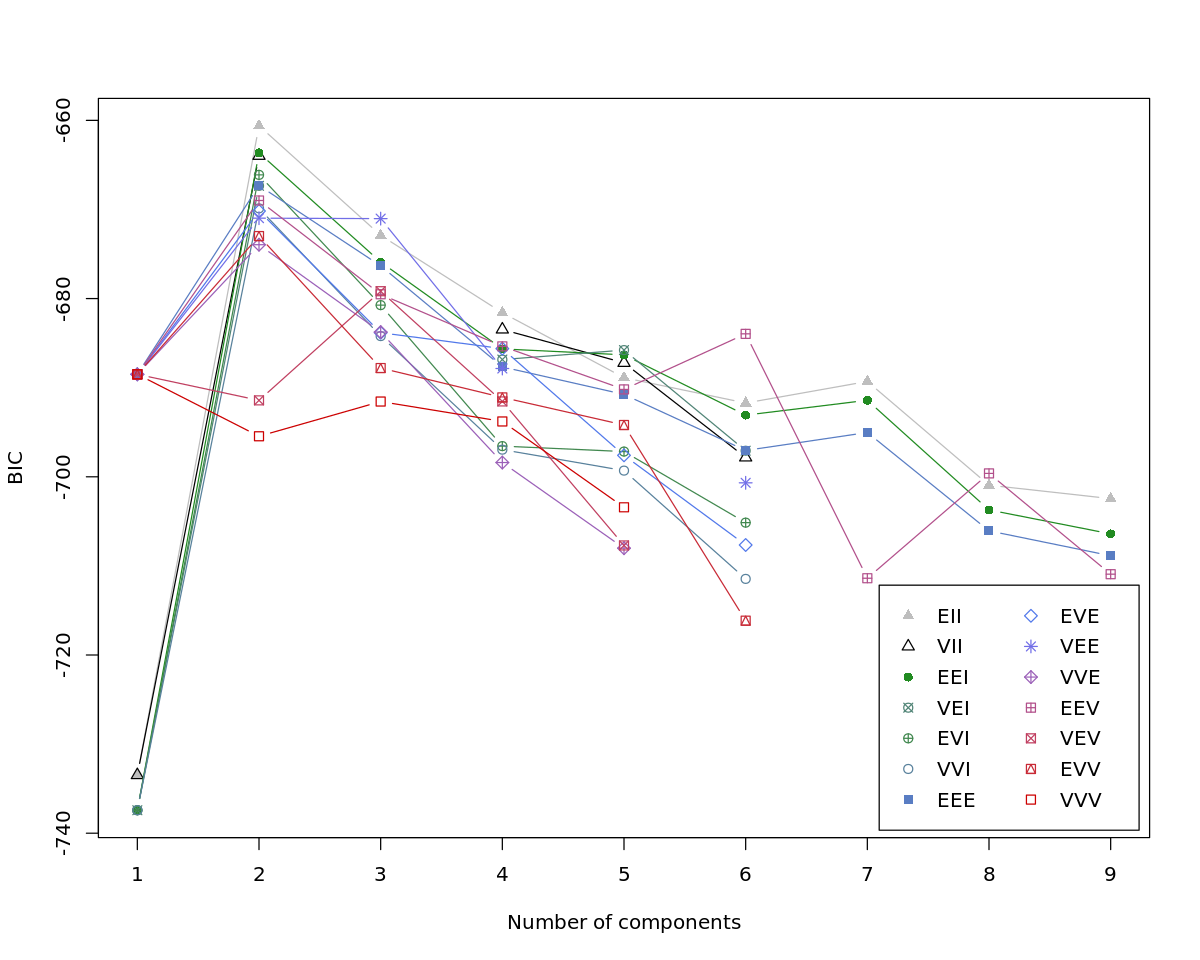

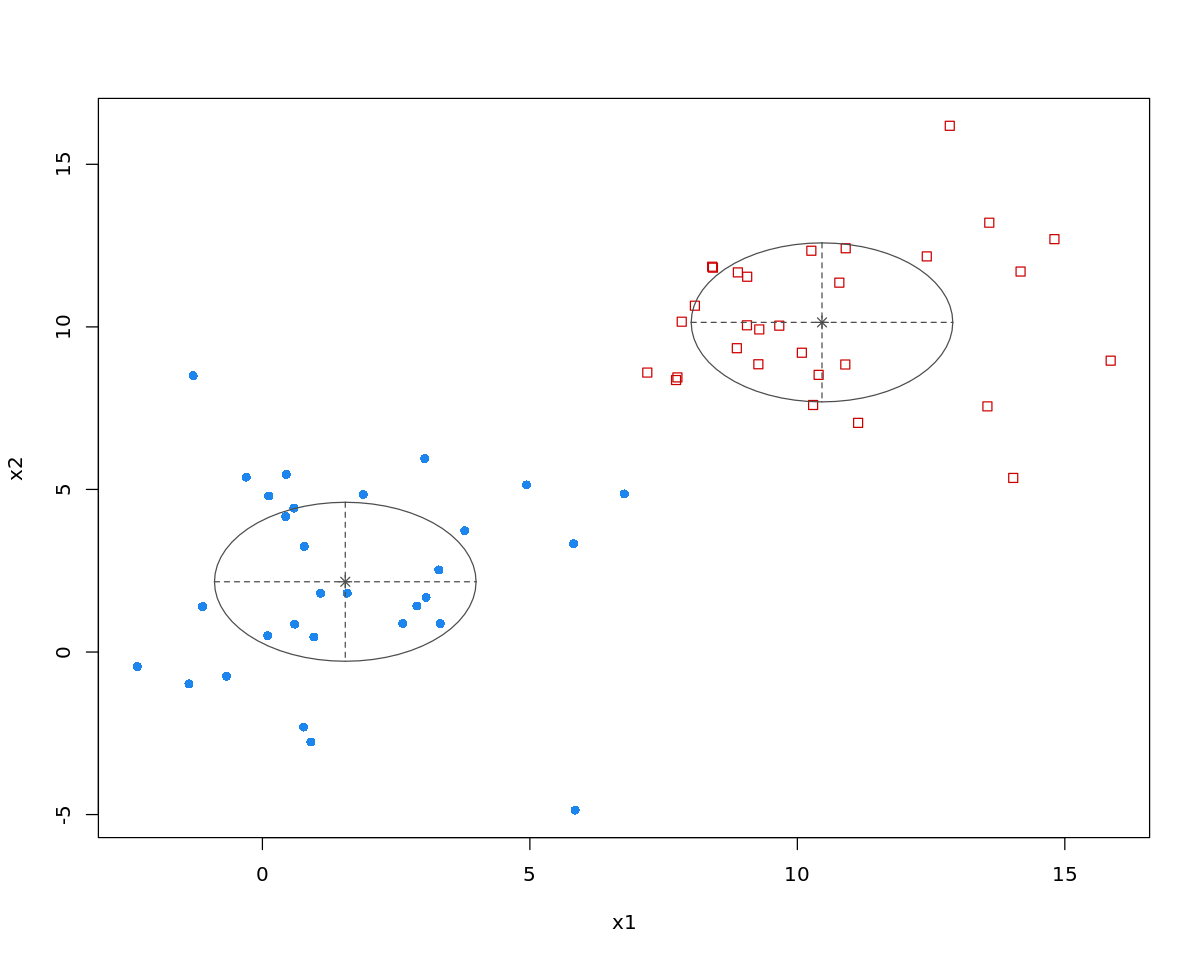

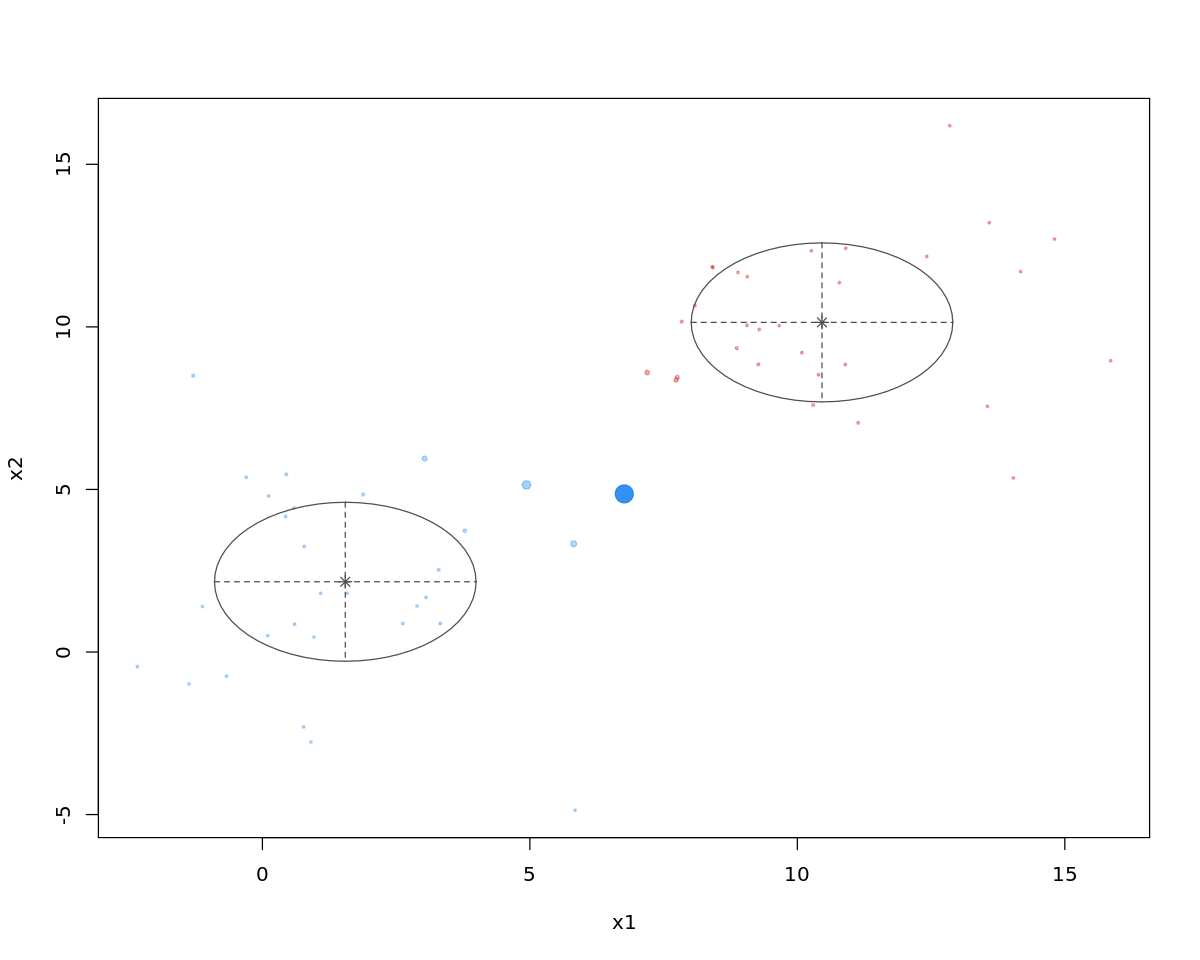

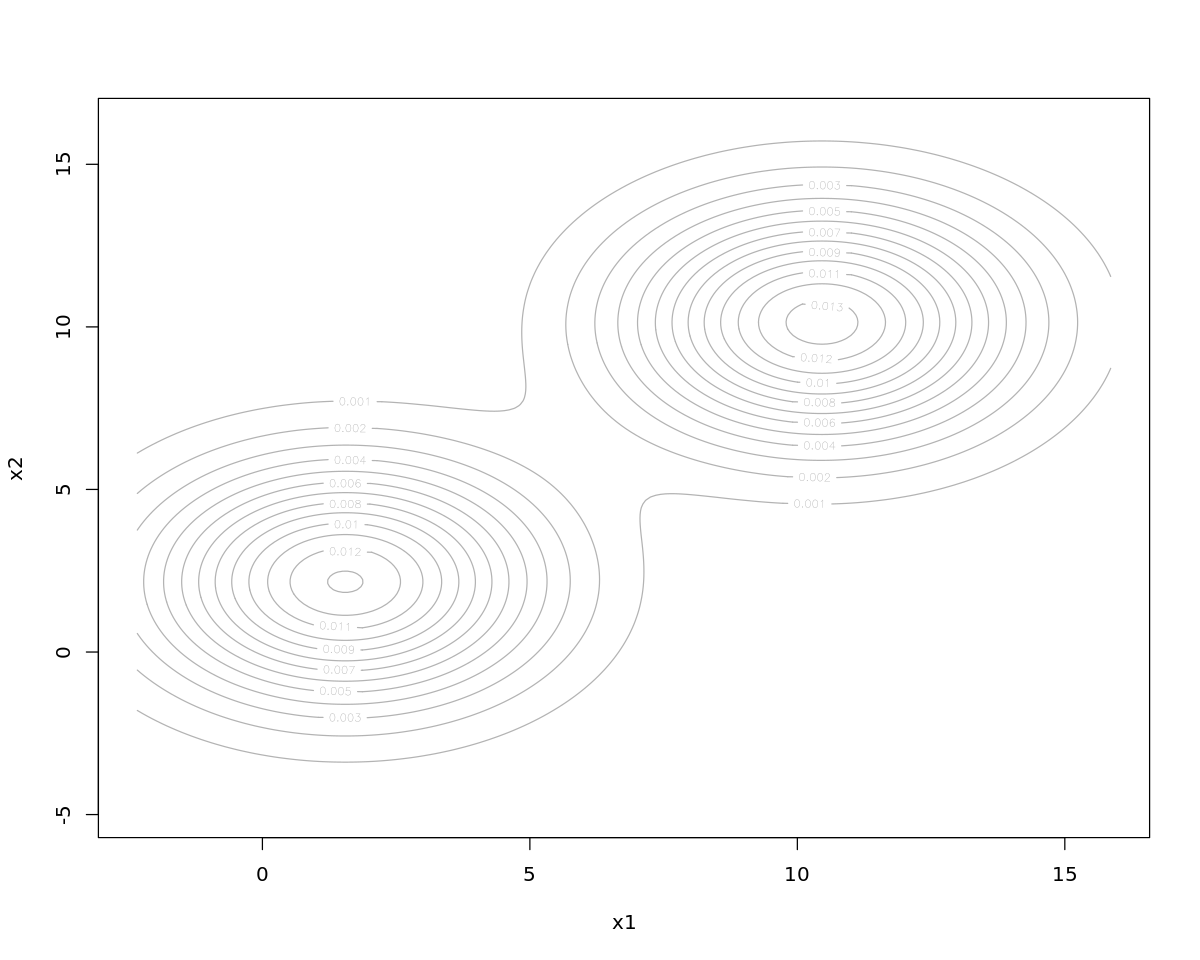

In [13]:
plot(m)

## Comparing clustering solutions

In [14]:
m1 <- kmeans(D$X, 2)
m2 <- Mclust(D$X)

d <- dist(D$X, method='euclidean')

s <- cluster.stats(d, m1$cluster, m2$cluster)
print(s)

$n
[1] 60

$cluster.number
[1] 2

$cluster.size
[1] 30 30

$min.cluster.size
[1] 30

$noisen
[1] 0

$diameter
[1] 10.89581 15.15251

$average.distance
[1] 4.034249 4.647682

$median.distance
[1] 3.649638 4.319535

$separation
[1] 3.633523 3.633523

$average.toother
[1] 12.4389 12.4389

$separation.matrix
         [,1]     [,2]
[1,] 0.000000 3.633523
[2,] 3.633523 0.000000

$ave.between.matrix
        [,1]    [,2]
[1,]  0.0000 12.4389
[2,] 12.4389  0.0000

$average.between
[1] 12.4389

$average.within
[1] 4.340965

$n.between
[1] 900

$n.within
[1] 870

$max.diameter
[1] 15.15251

$min.separation
[1] 3.633523

$within.cluster.ss
[1] 709.94

$clus.avg.silwidths
        1         2 
0.6738004 0.6067246 

$avg.silwidth
[1] 0.6402625

$g2
NULL

$g3
NULL

$pearsongamma
[1] 0.8017156

$dunn
[1] 0.2397967

$dunn2
[1] 2.676367

$entropy
[1] 0.6931472

$wb.ratio
[1] 0.348983

$ch
[1] 175.8875

$cwidegap
[1] 3.071360 5.367805

$widestgap
[1] 5.367805

$sindex
[1] 3.88928

$corrected.rand
NULL

$v

## Silhouette score

In [15]:
s <- silhouette(m1$cluster, d)
print(summary(s))

Silhouette of 60 units in 2 clusters from silhouette.default(x = m1$cluster, dist = d) :
 Cluster sizes and average silhouette widths:
       30        30 
0.6738004 0.6067246 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04566 0.60988 0.68303 0.64026 0.72343 0.75897 


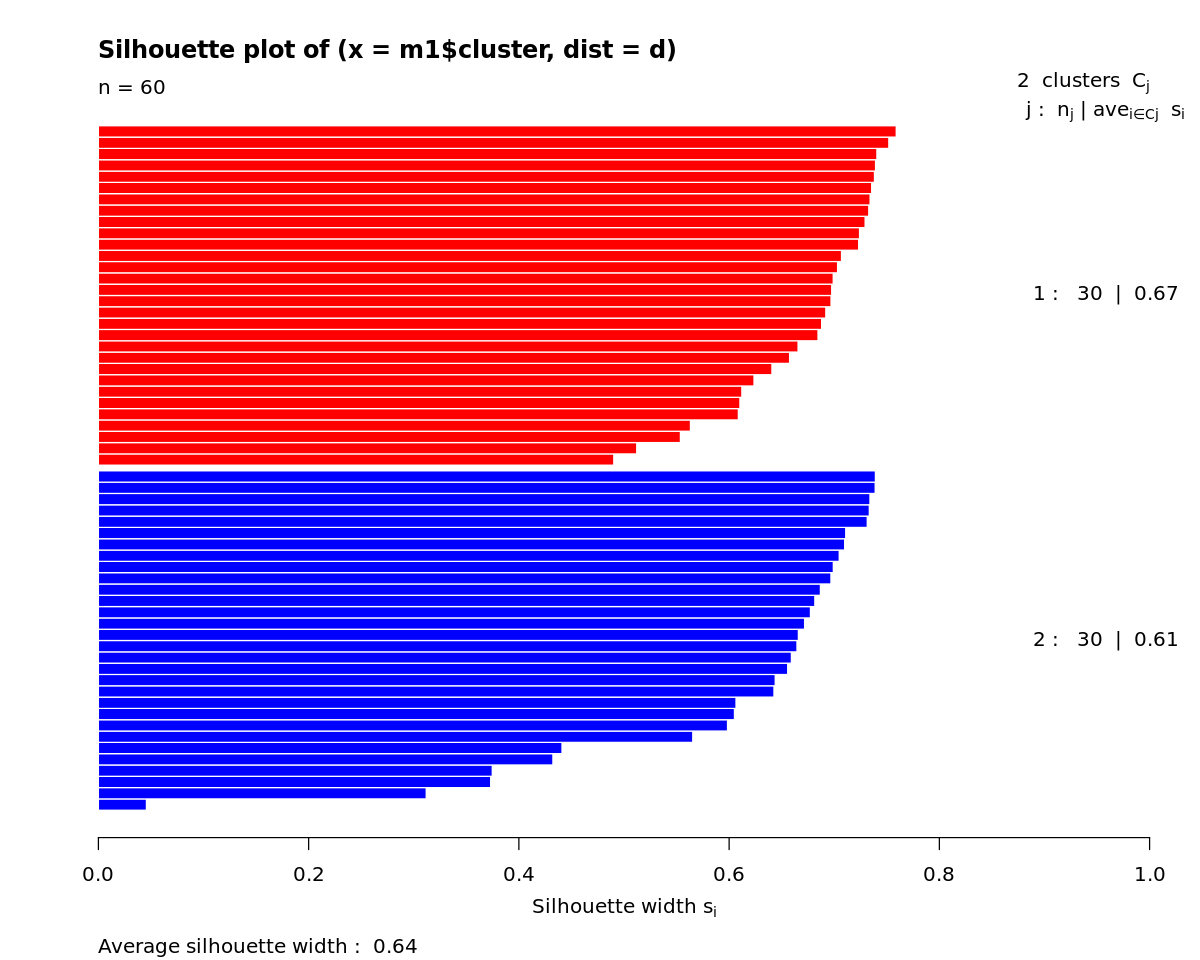

In [16]:
plot(s, col=c('red', 'blue'))